In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
sensor1 = pd.read_csv('sensor1_train.csv', names=['time', 'normal', 'fault']).drop(0)   # 데이터 프레임 형태로 데이터 불러오기 및 각 칼럼의 이름 지정, 단 drop을 통해 0행을 빼기
sensor2 = pd.read_csv('sensor2_train.csv', names=['time', 'normal', 'fault']).drop(0)



In [ ]:
sensor1

,time,normal,fault
1,0.0,-1.108138212888,-1.21260265
2,1.0,-0.6812512096588799,-0.7910335279
3,2.0,-0.004815925924319999,-0.4178318697
4,3.0,-0.38657179710576,-0.1718449348
5,4.0,-0.11844010806432,0.2767698353
...,...,...,...
99996,99995.0,-1.1941664081952001,-0.02307789
99997,99996.0,-1.8085553111952,0.071367348
99998,99997.0,-1.1448634496904,0.868632278
99999,99998.0,-1.0136420944656,0.633132478


In [ ]:
sensor2

,time,normal,fault
1,0,-1.26992588,-1.553335238
2,1,-1.327273821,-1.623481519
3,2,-0.825183584,-1.009339804
4,3,-0.656649554,-0.803194035
5,4,-0.039862442,-0.048758544
...,...,...,...
99996,99995,1.075869689,0.806928501
99997,99996,1.049536648,0.644724484
99998,99997,0.41314545,0.621914691
99999,99998,-0.114985849,0.262024617


In [ ]:

# 정상과 고장 데이터 각각 결합
normal = pd.concat([sensor1['normal'], sensor2['normal']], axis=1)
fault = pd.concat([sensor1['fault'], sensor2['fault']], axis=1)



In [ ]:

# 데이터 타입 변환
normal = normal.astype(dtype='float')
fault = fault.astype(dtype='float')


In [ ]:
normal.columns = ['s1', 's2']
fault.columns = ['s1', 's2']





In [ ]:
# 기본 통계량 계산
normal.info()
normal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   s1      100000 non-null  float64
 1   s2      100000 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


,s1,s2
count,100000.000000,100000.000000
mean,0.000403,0.000387
std,1.057398,1.085250
min,-3.669303,-2.259515
25%,-0.911921,-1.021511
50%,0.166069,-0.104522
75%,0.880135,1.012556
max,3.324198,2.429442


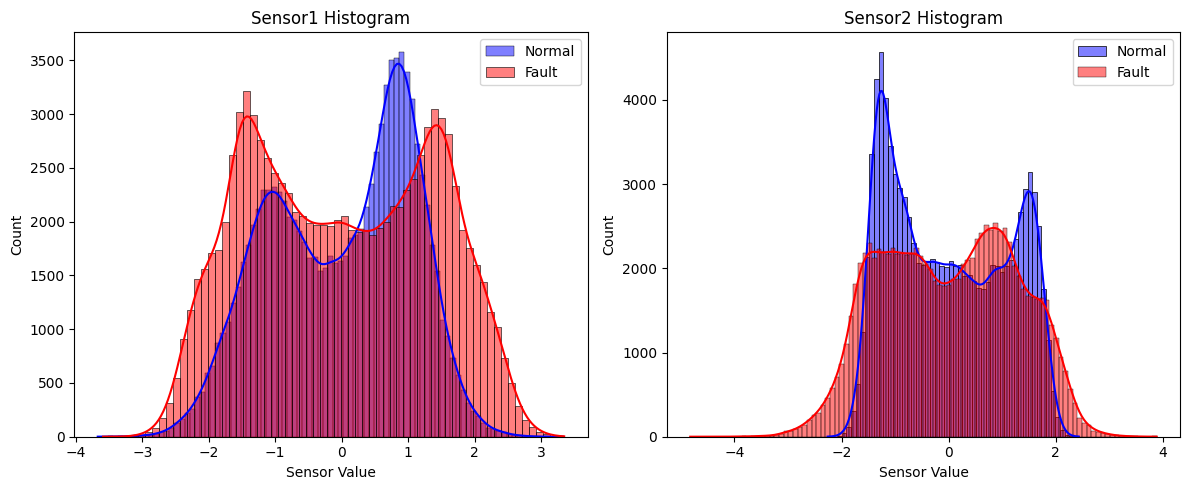

In [ ]:
# 히스토그램 시각화
plt.figure(figsize=(12, 5))  #전체 그림 사이즈 가로 12, 세로 5
steps = ['Sensor1', 'Sensor2'] #각 그래프의 리스트 이름
data_pairs = [(normal['s1'], fault['s1']), (normal['s2'], fault['s2'])] #normal과 fault에서 센서별 데이터를 짝지어 튜플로 묶어 리스트에 담기

for i, (title, (normal_data, fault_data)) in enumerate(zip(steps, data_pairs), 1):
    plt.subplot(1, 2, i) #data pairs을 가져와 각각 1번 2번을 통해 그림 그리기


    sns.histplot(normal_data, color='blue', label='Normal', kde=True)
    sns.histplot(fault_data, color='red', label='Fault', kde=True)
    plt.title(f'{title} Histogram')
    plt.legend()
    plt.xlabel('Sensor Value')

plt.tight_layout()
plt.show()

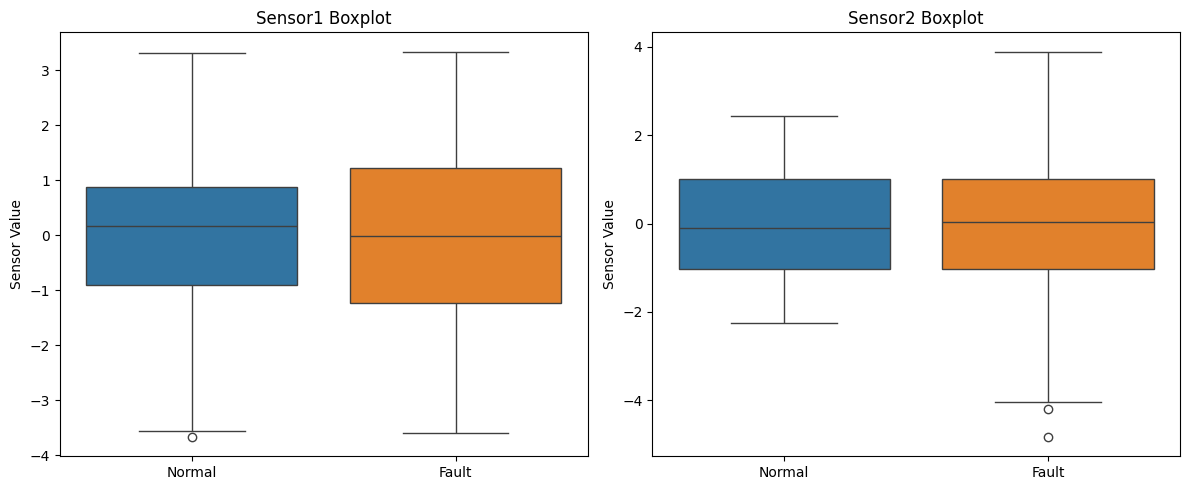

In [ ]:
# 박스플롯 시각화
plt.figure(figsize=(12, 5))

# 센서 이름과 데이터 묶기
steps = ['Sensor1', 'Sensor2']
data_pairs = [(normal['s1'], fault['s1']), (normal['s2'], fault['s2'])]

for i, (title, (normal_data, fault_data)) in enumerate(zip(steps, data_pairs), 1):
    plt.subplot(1, 2, i)

    # 박스플롯을 그리기 위해 데이터프레임으로 묶음
    combined = pd.DataFrame({
        'Normal': normal_data,
        'Fault': fault_data
    })

    sns.boxplot(data=combined)
    plt.title(f'{title} Boxplot')
    plt.ylabel('Sensor Value')


plt.tight_layout()
plt.show()

In [ ]:
sensor1[['normal', 'fault']] = sensor1[['normal', 'fault']].apply(pd.to_numeric, errors='coerce')
sensor2[['normal', 'fault']] = sensor2[['normal', 'fault']].apply(pd.to_numeric, errors='coerce')

# 결측치 제거 (필요 시)
sensor1 = sensor1.dropna(subset=['normal', 'fault'])
sensor2 = sensor2.dropna(subset=['normal', 'fault'])

# 다시 상관관계 계산
corr = sensor1[['normal', 'fault']].corrwith(sensor2[['normal', 'fault']])
print(corr)

normal    0.015491
fault     0.011032
dtype: float64


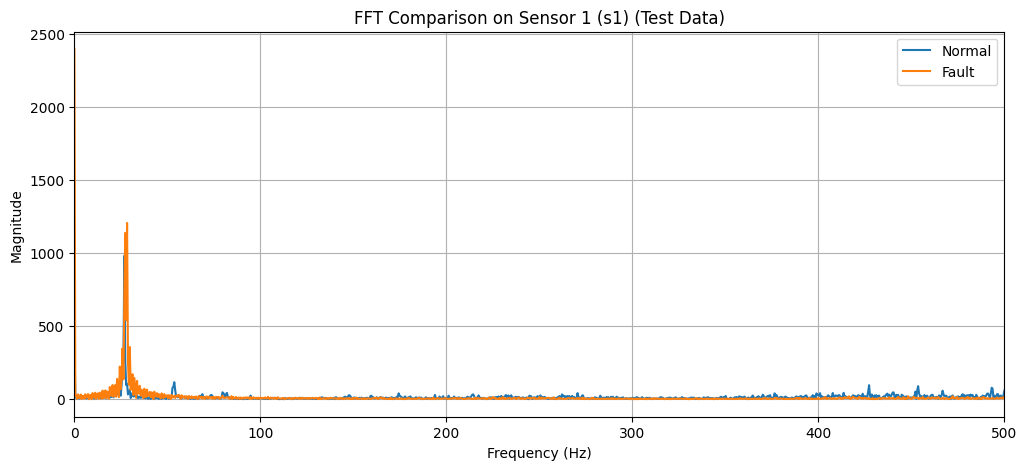

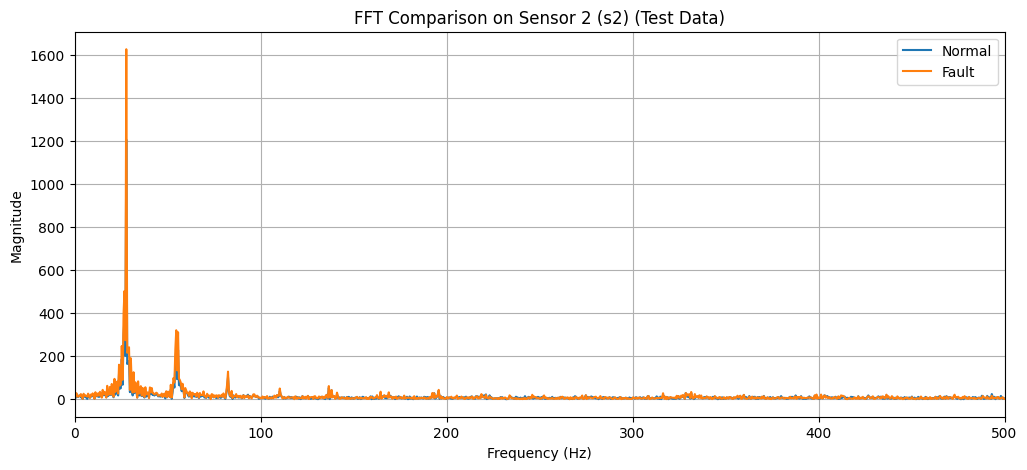

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 샘플링 주파수
SAMPLE_RATE = 1000  # Hz

# 1. 테스트 데이터 불러오기
sensor1_test = pd.read_csv('sensor1_test.csv', names=['time', 'normal', 'fault']).drop(0)
sensor2_test = pd.read_csv('sensor2_test.csv', names=['time', 'normal', 'fault']).drop(0)

# 2. 정상/고장 데이터 분리 및 정리
normal_test = pd.concat([sensor1_test['normal'].astype(float), sensor2_test['normal'].astype(float)], axis=1)
fault_test = pd.concat([sensor1_test['fault'].astype(float), sensor2_test['fault'].astype(float)], axis=1)
normal_test.columns = ['s1', 's2']
fault_test.columns = ['s1', 's2']

# 3. FFT 비교 함수 정의
def compare_fft(normal_signal, fault_signal, sample_rate=SAMPLE_RATE, title='s1'):
    n = len(normal_signal)
    freqs = np.fft.rfftfreq(n, d=1/sample_rate)

    fft_normal = np.abs(np.fft.rfft(normal_signal))
    fft_fault = np.abs(np.fft.rfft(fault_signal))

    plt.figure(figsize=(12, 5))
    plt.plot(freqs, fft_normal, label='Normal')
    plt.plot(freqs, fft_fault, label='Fault')
    plt.title(f'FFT Comparison on {title} (Test Data)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, sample_rate // 2)
    plt.show()

# 4. FFT 비교 시각화 (s1, s2 각각)
compare_fft(
    normal_test['s1'].values[:2048],
    fault_test['s1'].values[:2048],
    title='Sensor 1 (s1)'
)

compare_fft(
    normal_test['s2'].values[:2048],
    fault_test['s2'].values[:2048],
    title='Sensor 2 (s2)'
)


In [ ]:
normal.shape
fault.shape

(100000, 2)

Grid Search: 100%|██████████| 24/24 [11:32<00:00, 28.85s/it]



Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 1.0000
Validation Accuracy: 1.0000


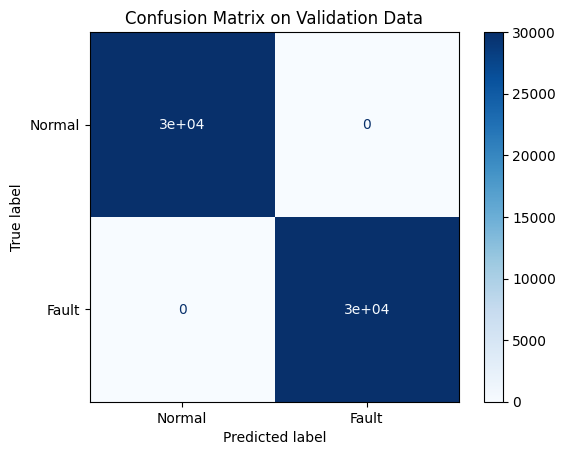

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import matplotlib.pyplot as plt

# 샘플링 주파수
SAMPLE_RATE = 1000  # Hz
N_FFT = 2048        # FFT 길이

# 1. 데이터 불러오기
sensor1 = pd.read_csv('sensor1_train.csv', names=['time', 'normal', 'fault']).drop(0)
sensor2 = pd.read_csv('sensor2_train.csv', names=['time', 'normal', 'fault']).drop(0)

# 2. 정상/고장 데이터 합치기
normal = pd.concat([sensor1['normal'].astype(float), sensor2['normal'].astype(float)], axis=1)
fault = pd.concat([sensor1['fault'].astype(float), sensor2['fault'].astype(float)], axis=1)
normal.columns = ['s1', 's2']
fault.columns = ['s1', 's2']

# 3. 통계 특성 추가
def add_stat_features(df):
    df['s1_mean'] = df['s1'].rolling(window=5, min_periods=1).mean()
    df['s1_std'] = df['s1'].rolling(window=5, min_periods=1).std().fillna(0)
    df['s2_mean'] = df['s2'].rolling(window=5, min_periods=1).mean()
    df['s2_std'] = df['s2'].rolling(window=5, min_periods=1).std().fillna(0)
    return df

normal = add_stat_features(normal)
fault = add_stat_features(fault)

# 4. FFT 기반 특징 추가
def add_fft_features(df):
    # DC 제거 + 윈도우 적용
    s1 = df['s1'].values[:N_FFT] - np.mean(df['s1'].values[:N_FFT])
    s2 = df['s2'].values[:N_FFT] - np.mean(df['s2'].values[:N_FFT])
    window = np.hanning(len(s1))
    s1 = s1 * window
    s2 = s2 * window

    # FFT 변환
    fft_s1 = np.abs(np.fft.rfft(s1))
    fft_s2 = np.abs(np.fft.rfft(s2))

    # 주요 피크 상위 몇 개 값(예: 5개) 추출
    top_k = 5
    top_s1 = np.sort(fft_s1)[-top_k:]
    top_s2 = np.sort(fft_s2)[-top_k:]

    # 특징 딕셔너리 반환
    features = {}
    for i, v in enumerate(top_s1):
        features[f's1_fft_peak{i+1}'] = v
    for i, v in enumerate(top_s2):
        features[f's2_fft_peak{i+1}'] = v

    return features

# normal/fault 각각에 FFT 특징 추가
normal_fft_features = add_fft_features(normal)
fault_fft_features = add_fft_features(fault)

for k, v in normal_fft_features.items():
    normal[k] = v
for k, v in fault_fft_features.items():
    fault[k] = v

# 5. 라벨 붙이기 및 데이터 병합
normal['label'] = 0
fault['label'] = 1
data = pd.concat([normal, fault], axis=0).reset_index(drop=True)

# 6. 특성과 타겟 분리
features = ['s1', 's2', 's1_mean', 's1_std', 's2_mean', 's2_std'] \
           + list(normal_fft_features.keys())
X = data[features]
y = data['label'].astype(int)

# 7. Train/Validation 나누기
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 8. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 9. 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 10. 교차검증 셋업
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 11. 그리드 탐색 + 교차검증
best_accuracy = 0
best_params = None
best_model = None

grid = list(ParameterGrid(param_grid))
for params in tqdm(grid, desc='Grid Search'):
    cv_accuracies = []
    for train_idx, val_idx in cv.split(X_train_scaled, y_train):
        X_tr, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = RandomForestClassifier(random_state=42, **params)
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val_cv)
        acc = accuracy_score(y_val_cv, preds)
        cv_accuracies.append(acc)

    mean_cv_acc = np.mean(cv_accuracies)
    if mean_cv_acc > best_accuracy:
        best_accuracy = mean_cv_acc
        best_params = params
        best_model = RandomForestClassifier(random_state=42, **best_params)
        best_model.fit(X_train_scaled, y_train)

print(f"\nBest Hyperparameters: {best_params}")
print(f"Best CV Accuracy: {best_accuracy:.4f}")

# 12. 최종 검증 데이터 평가
y_val_pred = best_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 13. 혼동행렬 시각화
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fault'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Validation Data')
plt.show()


Validation Accuracy: 0.9946


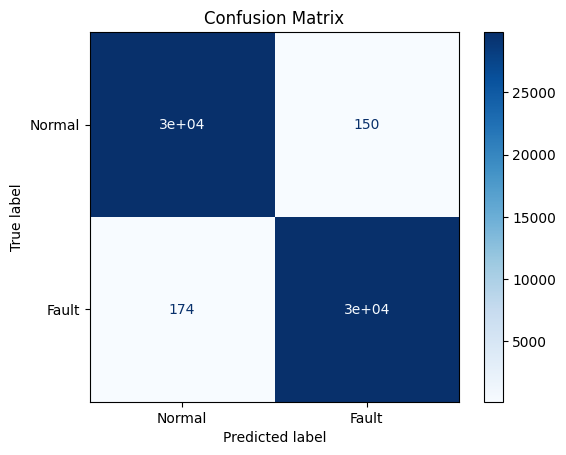

총 샘플 수: 200000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 설정
N_FFT = 256  # 한 시점마다 FFT 계산에 사용할 길이

# --- 1. 데이터 불러오기 ---
sensor1 = pd.read_csv('sensor1_train.csv', names=['time', 'normal', 'fault']).drop(0)
sensor2 = pd.read_csv('sensor2_train.csv', names=['time', 'normal', 'fault']).drop(0)

normal = pd.DataFrame({
    's1': sensor1['normal'].astype(float),
    's2': sensor2['normal'].astype(float)
})
fault = pd.DataFrame({
    's1': sensor1['fault'].astype(float),
    's2': sensor2['fault'].astype(float)
})

# --- 2. 통계 + FFT 특징 함수 ---
def add_features(df):
    df = df.copy()
    df['s1_mean'] = df['s1'].rolling(window=5, min_periods=1).mean()
    df['s1_std'] = df['s1'].rolling(window=5, min_periods=1).std().fillna(0)
    df['s2_mean'] = df['s2'].rolling(window=5, min_periods=1).mean()
    df['s2_std'] = df['s2'].rolling(window=5, min_periods=1).std().fillna(0)

    # FFT 특징 (슬라이딩 방식)
    fft_features = {
        's1_fft_peak1': [],
        's1_fft_peak2': [],
        's2_fft_peak1': [],
        's2_fft_peak2': []
    }

    for i in range(len(df)):
        if i < N_FFT:
            fft_features['s1_fft_peak1'].append(0)
            fft_features['s1_fft_peak2'].append(0)
            fft_features['s2_fft_peak1'].append(0)
            fft_features['s2_fft_peak2'].append(0)
        else:
            s1_win = df['s1'].iloc[i-N_FFT:i].values - np.mean(df['s1'].iloc[i-N_FFT:i])
            s2_win = df['s2'].iloc[i-N_FFT:i].values - np.mean(df['s2'].iloc[i-N_FFT:i])
            window = np.hanning(N_FFT)
            s1_fft = np.abs(np.fft.rfft(s1_win * window))
            s2_fft = np.abs(np.fft.rfft(s2_win * window))
            top_s1 = np.sort(s1_fft)[-2:]
            top_s2 = np.sort(s2_fft)[-2:]
            fft_features['s1_fft_peak1'].append(top_s1[-1])
            fft_features['s1_fft_peak2'].append(top_s1[-2])
            fft_features['s2_fft_peak1'].append(top_s2[-1])
            fft_features['s2_fft_peak2'].append(top_s2[-2])

    for k in fft_features:
        df[k] = fft_features[k]

    return df

# --- 3. 특징 추가 ---
normal = add_features(normal)
fault = add_features(fault)

# --- 4. 라벨링 및 병합 ---
normal['label'] = 0
fault['label'] = 1
data = pd.concat([normal, fault], axis=0).reset_index(drop=True)

# --- 5. 학습 준비 ---
features = [col for col in data.columns if col != 'label']
X = data[features]
y = data['label'].astype(int)

# --- 6. Train/Validation split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# --- 7. 스케일링 + 모델 ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# --- 8. 평가 ---
y_val_pred = model.predict(X_val_scaled)
acc = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {acc:.4f}')

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fault'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# --- 9. 최종 확인 ---
print(f"총 샘플 수: {len(X)}")



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# 예측값 y_val_pred, 실제값 y_val 가 있다고 가정

f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

F1-score: 0.9946
Precision: 0.9950
Recall: 0.9942


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:57:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy: 0.9925


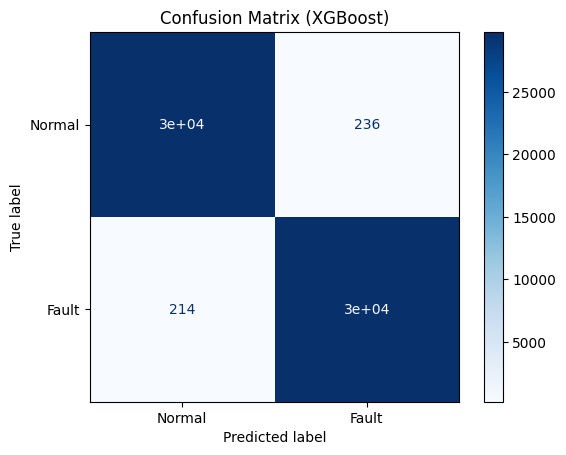

총 샘플 수: 200000


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 설정
N_FFT = 256  # FFT 길이

# --- 1. 데이터 불러오기 ---
sensor1 = pd.read_csv('sensor1_train.csv', names=['time', 'normal', 'fault']).drop(0)
sensor2 = pd.read_csv('sensor2_train.csv', names=['time', 'normal', 'fault']).drop(0)

normal = pd.DataFrame({
    's1': sensor1['normal'].astype(float),
    's2': sensor2['normal'].astype(float)
})
fault = pd.DataFrame({
    's1': sensor1['fault'].astype(float),
    's2': sensor2['fault'].astype(float)
})

# --- 2. 통계 + FFT 특징 함수 ---
def add_features(df):
    df = df.copy()
    df['s1_mean'] = df['s1'].rolling(window=5, min_periods=1).mean()
    df['s1_std'] = df['s1'].rolling(window=5, min_periods=1).std().fillna(0)
    df['s2_mean'] = df['s2'].rolling(window=5, min_periods=1).mean()
    df['s2_std'] = df['s2'].rolling(window=5, min_periods=1).std().fillna(0)

    fft_features = {
        's1_fft_peak1': [],
        's1_fft_peak2': [],
        's2_fft_peak1': [],
        's2_fft_peak2': []
    }

    for i in range(len(df)):
        if i < N_FFT:
            fft_features['s1_fft_peak1'].append(0)
            fft_features['s1_fft_peak2'].append(0)
            fft_features['s2_fft_peak1'].append(0)
            fft_features['s2_fft_peak2'].append(0)
        else:
            s1_win = df['s1'].iloc[i-N_FFT:i].values - np.mean(df['s1'].iloc[i-N_FFT:i])
            s2_win = df['s2'].iloc[i-N_FFT:i].values - np.mean(df['s2'].iloc[i-N_FFT:i])
            window = np.hanning(N_FFT)
            s1_fft = np.abs(np.fft.rfft(s1_win * window))
            s2_fft = np.abs(np.fft.rfft(s2_win * window))
            top_s1 = np.sort(s1_fft)[-2:]
            top_s2 = np.sort(s2_fft)[-2:]
            fft_features['s1_fft_peak1'].append(top_s1[-1])
            fft_features['s1_fft_peak2'].append(top_s1[-2])
            fft_features['s2_fft_peak1'].append(top_s2[-1])
            fft_features['s2_fft_peak2'].append(top_s2[-2])

    for k in fft_features:
        df[k] = fft_features[k]

    return df

# --- 3. 특징 추가 ---
normal = add_features(normal)
fault = add_features(fault)

# --- 4. 라벨링 및 병합 ---
normal['label'] = 0
fault['label'] = 1
data = pd.concat([normal, fault], axis=0).reset_index(drop=True)

# --- 5. 학습 준비 ---
features = [col for col in data.columns if col != 'label']
X = data[features]
y = data['label'].astype(int)

# --- 6. Train/Validation split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# --- 7. 스케일링 (XGBoost는 스케일링 필수는 아니지만 안정적 학습 위해 사용) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# --- 8. XGBoost 모델 학습 ---
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train_scaled, y_train)

# --- 9. 평가 ---
y_val_pred = model.predict(X_val_scaled)
acc = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {acc:.4f}')

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fault'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (XGBoost)')
plt.show()

# --- 10. 총 샘플 수 ---
print(f"총 샘플 수: {len(X)}")


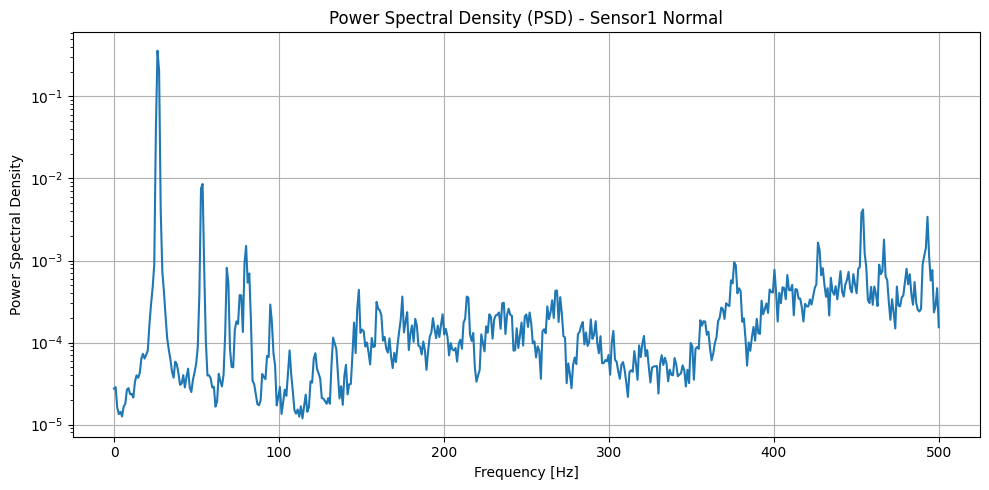

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# 샘플링 주파수 (Hz) - 데이터에 따라 설정
fs = 1000

# 센서1의 정상 데이터 불러오기
sensor1 = pd.read_csv('sensor1_train.csv', names=['time', 'normal', 'fault']).drop(0)
s1_normal = sensor1['normal'].astype(float).reset_index(drop=True)
signal = s1_normal[:10000].values  # 분석할 신호 구간

# PSD 계산 (Welch’s method) - 윈도우 이름 수정
f, Pxx = welch(signal, fs=fs, window='hann', nperseg=1024, noverlap=512)

# PSD 시각화
plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx)
plt.title('Power Spectral Density (PSD) - Sensor1 Normal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.tight_layout()
plt.show()

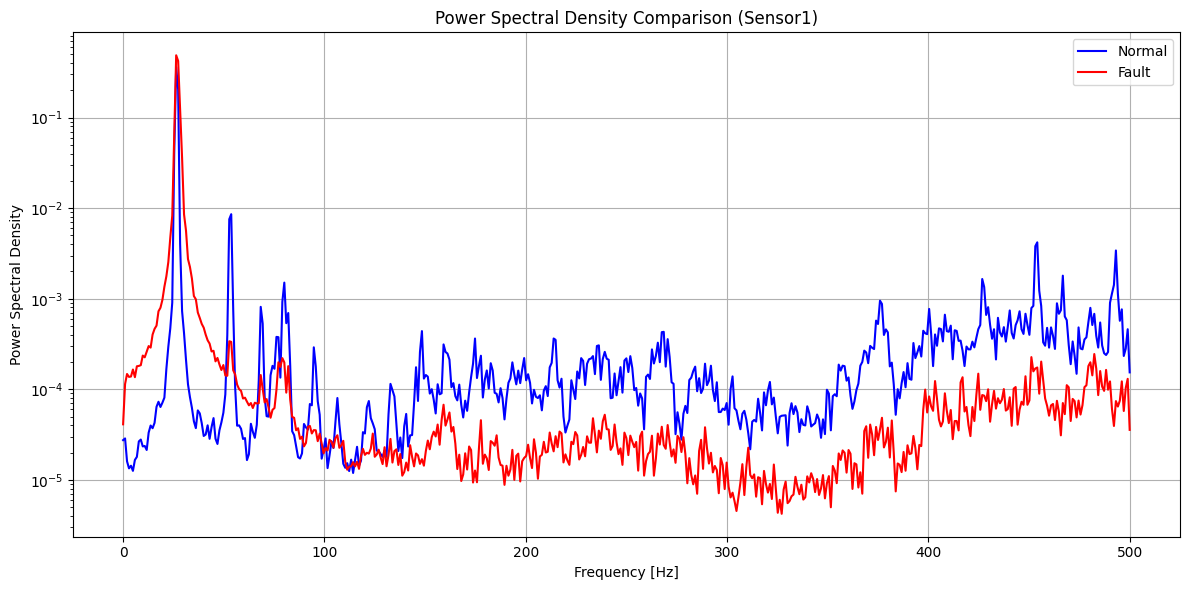

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# 샘플링 주파수 (Hz)
fs = 1000

# --- 데이터 불러오기 ---
sensor1 = pd.read_csv('sensor1_train.csv', names=['time', 'normal', 'fault']).drop(0)

# float 변환 및 인덱스 정리
s1_normal = sensor1['normal'].astype(float).reset_index(drop=True)
s1_fault = sensor1['fault'].astype(float).reset_index(drop=True)

# 분석에 사용할 구간 (앞에서 10000개 샘플)
signal_normal = s1_normal[:10000].values
signal_fault = s1_fault[:10000].values

# --- PSD 계산 (Welch’s method) ---
f_normal, Pxx_normal = welch(signal_normal, fs=fs, window='hann', nperseg=1024, noverlap=512)
f_fault, Pxx_fault = welch(signal_fault, fs=fs, window='hann', nperseg=1024, noverlap=512)

# --- PSD 시각화 ---
plt.figure(figsize=(12, 6))
plt.semilogy(f_normal, Pxx_normal, label='Normal', color='blue')
plt.semilogy(f_fault, Pxx_fault, label='Fault', color='red')
plt.title('Power Spectral Density Comparison (Sensor1)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


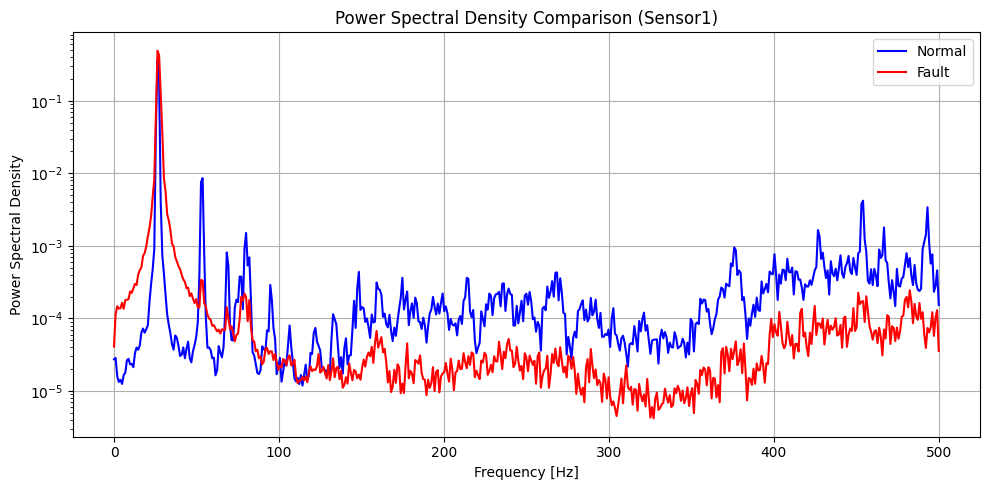

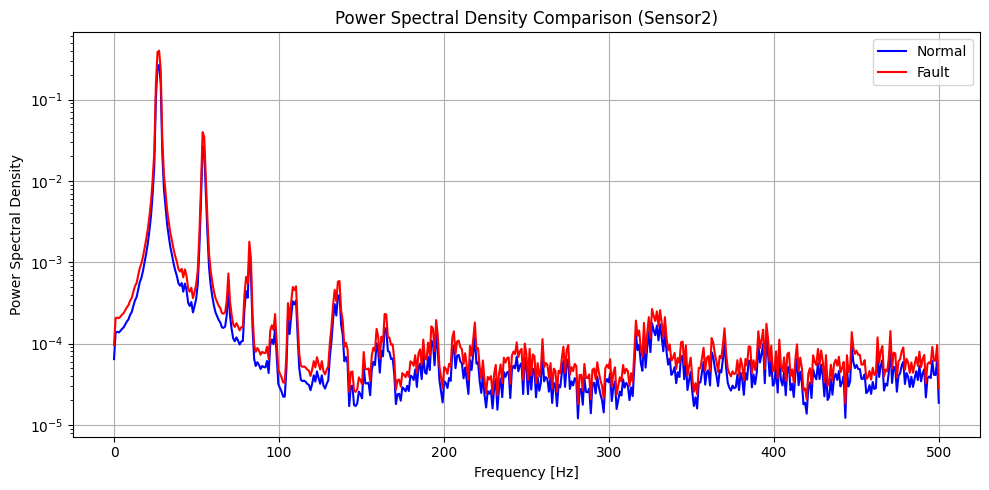

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# 샘플링 주파수 (Hz)
fs = 1000

# sensor1, sensor2 데이터 불러오기
sensor1 = pd.read_csv('sensor1_train.csv', header=0)
sensor2 = pd.read_csv('sensor2_train.csv', header=0)

# PSD 계산용 신호
s1_normal = sensor1['normal'].astype(float).reset_index(drop=True)
s1_fault = sensor1['fault'].astype(float).reset_index(drop=True)
s2_normal = sensor2['normal'].astype(float).reset_index(drop=True)
s2_fault = sensor2['fault'].astype(float).reset_index(drop=True)

signal_s1_normal = s1_normal[:10000].values
signal_s1_fault = s1_fault[:10000].values
signal_s2_normal = s2_normal[:10000].values
signal_s2_fault = s2_fault[:10000].values

# Welch PSD 계산 함수
def calc_psd(signal):
    f, Pxx = welch(signal, fs=fs, window='hann', nperseg=1024, noverlap=512)
    return f, Pxx

# PSD 계산
f_s1_normal, Pxx_s1_normal = calc_psd(signal_s1_normal)
f_s1_fault, Pxx_s1_fault = calc_psd(signal_s1_fault)
f_s2_normal, Pxx_s2_normal = calc_psd(signal_s2_normal)
f_s2_fault, Pxx_s2_fault = calc_psd(signal_s2_fault)

# PSD 시각화 (Sensor1)
plt.figure(figsize=(10, 5))
plt.semilogy(f_s1_normal, Pxx_s1_normal, label='Normal', color='blue')
plt.semilogy(f_s1_fault, Pxx_s1_fault, label='Fault', color='red')
plt.title('Power Spectral Density Comparison (Sensor1)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PSD 시각화 (Sensor2)
plt.figure(figsize=(10, 5))
plt.semilogy(f_s2_normal, Pxx_s2_normal, label='Normal', color='blue')
plt.semilogy(f_s2_fault, Pxx_s2_fault, label='Fault', color='red')
plt.title('Power Spectral Density Comparison (Sensor2)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
